In [15]:
from piron import FitsArray, Coordinates, Calculator, APhot, Fixer

In [3]:
fa = FitsArray.from_pattern("data/cali/*.fit")
fa

FitsArray(@: 140292036588736, nof: 510)

In [4]:
site = Coordinates.location(45, 45, 2000)
site

<EarthLocation (3195419.14506057, 3195419.14506057, 4488762.62242829) m>

In [6]:
sky = Coordinates.position_from_name("V523 Cas")
sky

<SkyCoord (ICRS): (ra, dec) in deg
    (10.02611629, 50.23764397)>

In [7]:
ca = Calculator(fa)
ca

Calculator(id: 140292035125040, fits_array: FitsArray(@: 140292036588736, nof: 510))

In [27]:
ca.sec_z("DATE-OBS", site, sky, new_key="AIRMASS")
ca.jd("DATE-OBS", new_key="JD")

In [28]:
fa.hselect(["JD", "AIRMASS"])

,JD,AIRMASS
image,,
/mnt/c/Users/mshem/OneDrive/Belgeler/iron/data/cali/V523_Cas-001B.fit,2456549.396759259,1.0104213702811646
/mnt/c/Users/mshem/OneDrive/Belgeler/iron/data/cali/V523_Cas-001U.fit,2456549.3963078703,1.010636560259356
/mnt/c/Users/mshem/OneDrive/Belgeler/iron/data/cali/V523_Cas-001V.fit,2456549.397083333,1.0102691994036894
/mnt/c/Users/mshem/OneDrive/Belgeler/iron/data/cali/V523_Cas-002B.fit,2456549.3978819447,1.0099024923905002
/mnt/c/Users/mshem/OneDrive/Belgeler/iron/data/cali/V523_Cas-002U.fit,2456549.3974305554,1.0101083137450444
...,...,...
/mnt/c/Users/mshem/OneDrive/Belgeler/iron/data/cali/V523_Cas-169U.fit,2456549.593541667,1.318527891907293
/mnt/c/Users/mshem/OneDrive/Belgeler/iron/data/cali/V523_Cas-169V.fit,2456549.59431713,1.3219171037303774
/mnt/c/Users/mshem/OneDrive/Belgeler/iron/data/cali/V523_Cas-170B.fit,2456549.595104167,1.325383865774393


In [29]:
sources = Fixer.list_to_source(
    [
        [1135.652817, 1477.779439],
        [903.761980, 973.359417],
        [903.635603, 1172.350802],
        [584.292252, 769.740325],
        [778.648032, 348.619023],
    ]
)
sources

,xcentroid,ycentroid
0,1135.652817,1477.779439
1,903.761980,973.359417
2,903.635603,1172.350802
3,584.292252,769.740325
4,778.648032,348.619023


In [30]:
aphot = APhot(fa)
aphot

APhot(id: 140291665235248, fits_array: FitsArray(@: 140292036588736, nof: 510))

In [31]:
ape = 15
ann = 20
dan = 25

In [32]:
sep_phot = aphot.sep(sources, ape, extract=["JD", "FILTER", "AIRMASS"])
sep_phot

/mnt/c/Users/mshem/OneDrive/Belgeler/iron/piron/photometry.py:47: RuntimeWarning: divide by zero encountered in double_scalars
  merr = math.sqrt(flux / flux_error)


,xcentroid,ycentroid,mag,merr,flux,ferr,JD,FILTER,AIRMASS
image,,,,,,,,,
/mnt/c/Users/mshem/OneDrive/Belgeler/iron/data/cali/V523_Cas-001B.fit,1135.652817,1135.652817,16.281670,0.0,6.142740e+04,0.0,2456549.396759259,Bessel_B,1.0104213702811646
/mnt/c/Users/mshem/OneDrive/Belgeler/iron/data/cali/V523_Cas-001B.fit,903.761980,903.761980,16.227059,0.0,6.459613e+04,0.0,2456549.396759259,Bessel_B,1.0104213702811646
/mnt/c/Users/mshem/OneDrive/Belgeler/iron/data/cali/V523_Cas-001B.fit,903.635603,903.635603,16.227402,0.0,6.457574e+04,0.0,2456549.396759259,Bessel_B,1.0104213702811646
/mnt/c/Users/mshem/OneDrive/Belgeler/iron/data/cali/V523_Cas-001B.fit,584.292252,584.292252,16.317011,0.0,5.946007e+04,0.0,2456549.396759259,Bessel_B,1.0104213702811646
/mnt/c/Users/mshem/OneDrive/Belgeler/iron/data/cali/V523_Cas-001B.fit,778.648032,778.648032,16.244930,0.0,6.354157e+04,0.0,2456549.396759259,Bessel_B,1.0104213702811646
...,...,...,...,...,...,...,...,...,...
/mnt/c/Users/mshem/OneDrive/Belgeler/iron/data/cali/V523_Cas-170V.fit,1135.652817,1135.652817,12.464644,0.0,1.549650e+06,0.0,2456549.595439815,Bessel_V,1.326870649577242
/mnt/c/Users/mshem/OneDrive/Belgeler/iron/data/cali/V523_Cas-170V.fit,903.761980,903.761980,12.463200,0.0,1.551712e+06,0.0,2456549.595439815,Bessel_V,1.326870649577242
/mnt/c/Users/mshem/OneDrive/Belgeler/iron/data/cali/V523_Cas-170V.fit,903.635603,903.635603,12.463469,0.0,1.551328e+06,0.0,2456549.595439815,Bessel_V,1.326870649577242


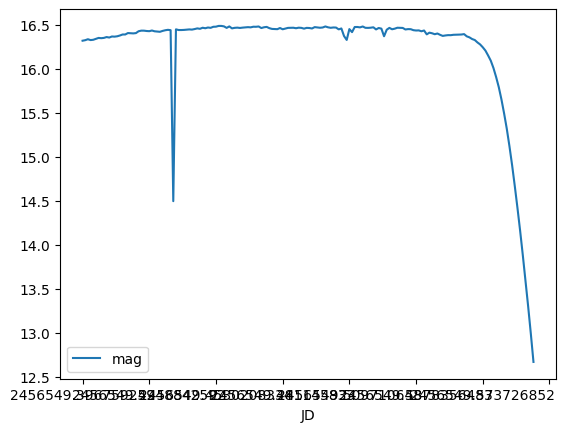

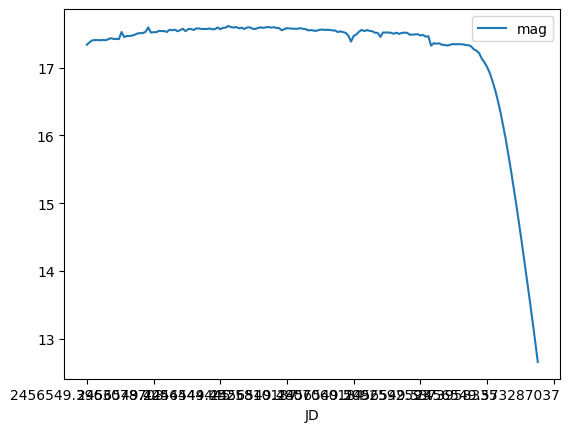

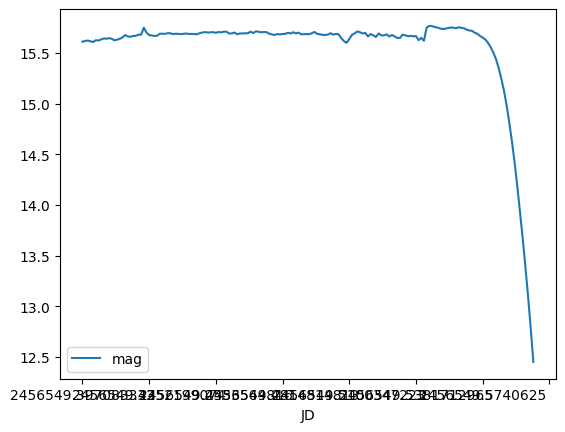

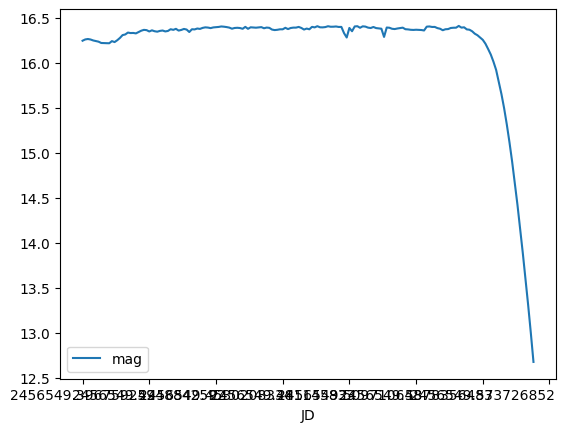

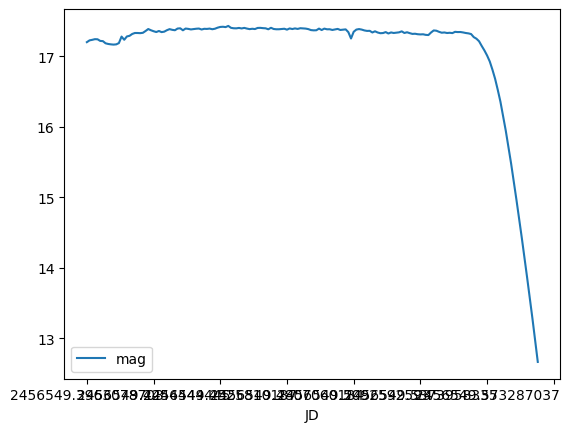

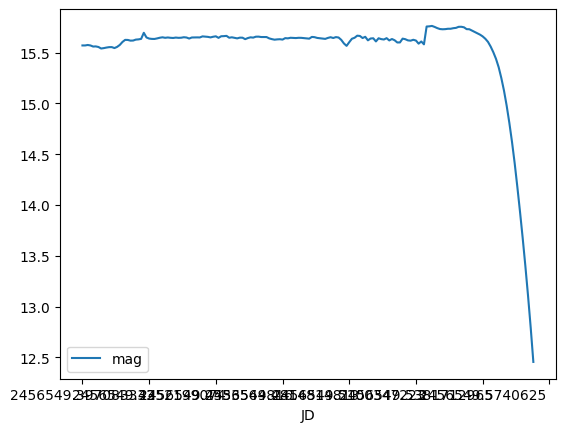

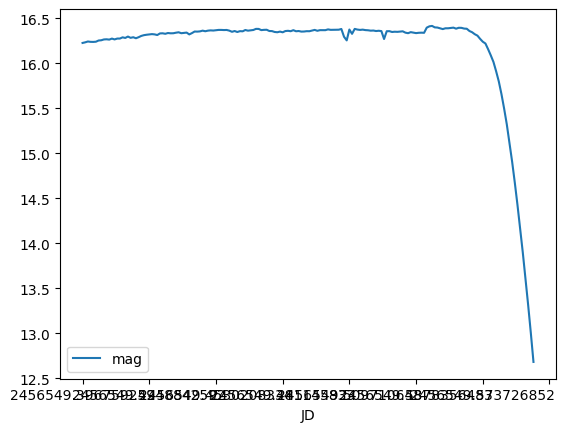

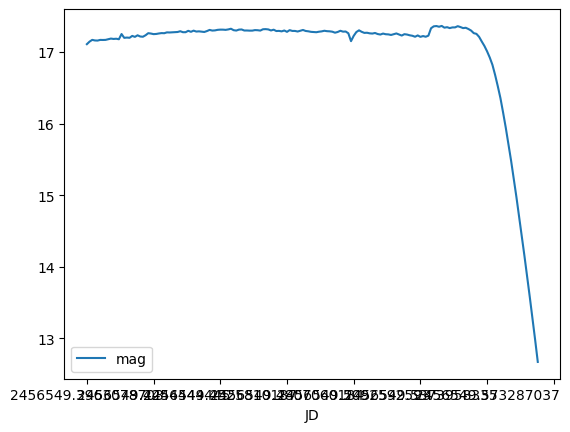

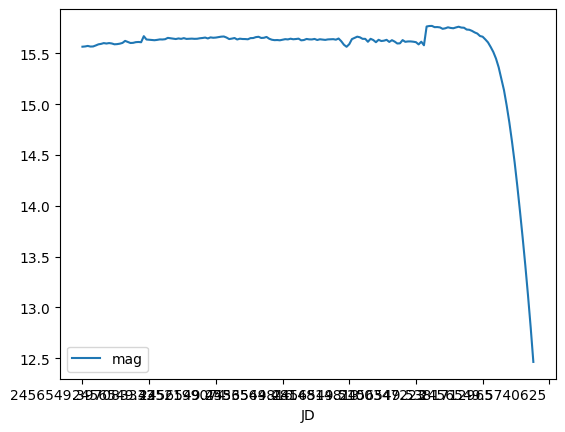

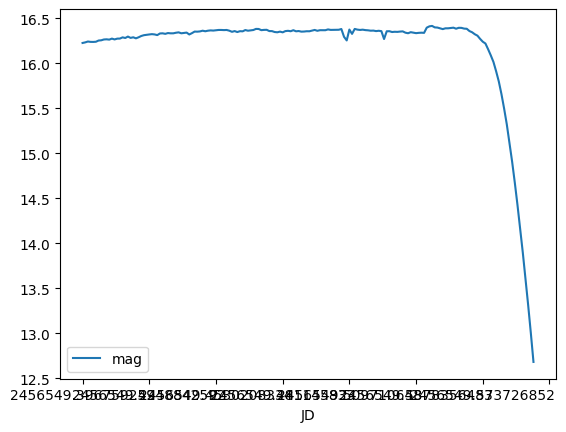

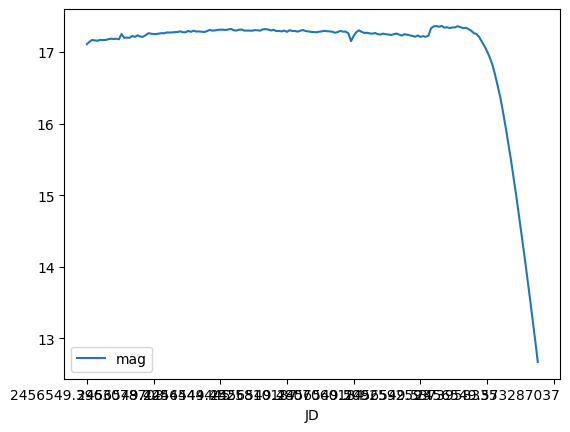

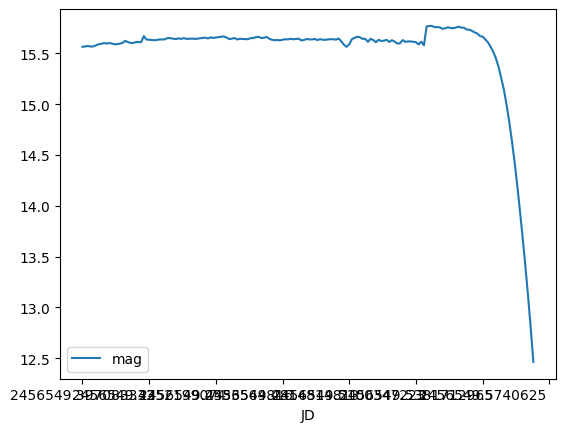

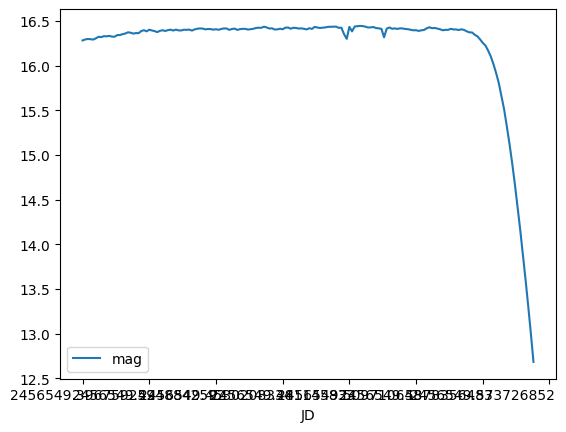

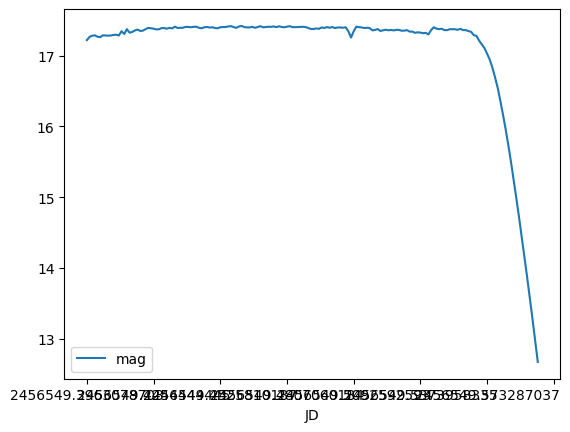

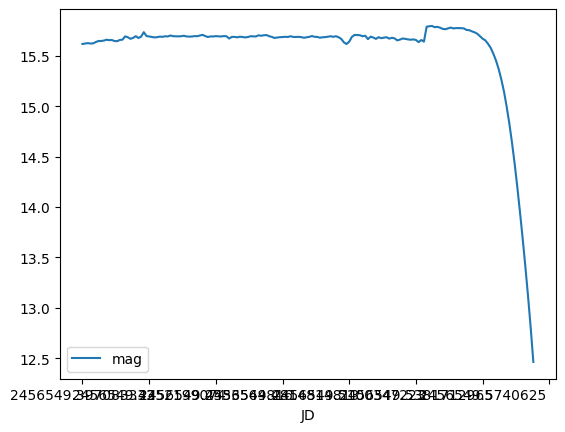

In [40]:
for key, df in sep_phot.groupby(["xcentroid", "FILTER"]):
    df.plot("JD", "mag")